# **Наследование и абстрактные классы**

Когда инженеры разрабатывают линейку продуктов, таких как холодильники, они начинают с базовой модели.
Например, базовый холодильник поставляется с холодильным и морозильным отделениями. При
создании специализированной модели, такой как холодильник с льдогенератором в морозильной камере и
внешним дозатором холодной воды, инженеры не создают новую модель с нуля, а
вместо этого адаптируют существующую модель с новыми функциями и поведением.

Разработчики программного обеспечения придерживаются аналогичной практики повторного использования существующих моделей, а не создания
совершенно новые модели с нуля. Например, функция с параметрами отражает
идею использования общего алгоритма в различных ситуациях. Класс с его объектами расширяет
эту стратегию до набора методов и связанных с ними данных. Но, пожалуй, самый мощный способ, с
помощью которого программист может повторно использовать существующую модель для создания новых моделей, - это использование
функции объектно-ориентированных языков, называемой наследованием. Когда новый класс становится подклассом более общего класса, новый класс приобретает все функции существующего класса и
поведение передается по наследству, как неожиданный запас свободного кода. Повторное использование существующего кода устраняет
избыточность и облегчает обслуживание и верификацию программных систем.

В этой главе рассматриваются стратегии использования наследования при проектировании объектно-ориентированного программного
обеспечения, а также еще один механизм повторного использования кода: абстрактные классы. В процессе
работы ресурсы пакета, описанные в главе 5 “Интерфейсы, реализации и полиморфизм”
, помещаются в новую программную среду, которая подготавливает почву для изучения других
типов коллекций далее в этой книге.

## **Использование наследования для настройки существующего класса**

Безусловно, самый простой и понятный способ воспользоваться преимуществами наследования - это использовать его
для настройки существующего класса. В идеале два класса должны иметь одинаковый интерфейс, чтобы клиенты
могли использовать их одинаково. Но один из двух классов предоставит пользователям некоторое специализированное
поведение.

### **Создание подкласса существующего класса**

В этом разделе используется магия наследования, превращая класс
ArraySortedBag в подкласс класса ArrayBag. ArrayBag называется родительским или суперклассом
ArraySortedBag. Взаимосвязь подкласса и суперкласса (наследование) изображена
на диаграмме классов на рисунке 6-1. На диаграмме сплошной стрелкой обозначен подкласс/
отношение суперкласса, тогда как пунктирная стрелка указывает на отношение класс/интерфейс.

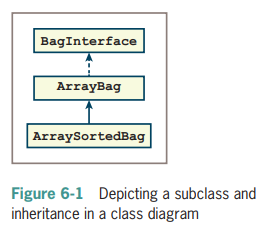

Стоит обратить внимание, что поскольку класс ArrayBag реализует BagInterface, класс
ArraySortedBag также реализует этот интерфейс посредством наследования.
Когда вы начали работу над классом ArraySortedBag в проекте 8 главы 5, вы скопировали
код из ArrayBag, наиболее похожего класса, в новый файл. Затем вы изменили имя
класса во всем файле, изменили метод добавления и добавили метод __contains__.

Стратегия создания подкласса существующего класса кардинально отличается. Вы по-прежнему
работаете с копией файла родительского класса, но теперь выполняете следующие шаги:

1.   Начните с удаления всех методов, которые не нужно изменять. Они будут автоматически включены из родительского класса с помощью механизма наследования windfall.
Однако обратите внимание, что вам по-прежнему нужен метод __init__ в новом классе.
2.   Чтобы гарантировать, что наследование произойдет, вы должны поместить имя родительского
класса в круглые скобки заголовка класса.
3. Измените код для методов, которые должны измениться (включая __init__).
4. Добавляйте любые новые методы.

### **Пересмотр метода __init__**

Класс ArraySortedBag не включает никаких новых переменных экземпляра, поэтому не похоже
, что его метод __init__ будет иметь какое-либо отношение. Вы можете подумать, что поскольку
метод __init__ уже доступен в родительском классе ArrayBag, этот метод будет вызываться
автоматически, когда программист создаст экземпляр ArraySortedBag. Однако
это единственный случай, когда наследование не является автоматическим. Следовательно, метод __init__ в ArraySortedBag должен вызывать метод __init__ в родительском классе ArrayBag, чтобы он
мог инициализировать содержащиеся там данные. Синтаксис для вызова этого метода в родительском классе таков
ArrayBag.__init__(self, sourceCollection).

Поскольку пользователь создает отсортированный пакет таким же образом, как и обычный пакет, определение метода
__init__ для отсортированного пакета должно иметь тот же заголовок, что и метод __init__ в
родительском классе.
Вот код для изменений в ArraySortedBag, обсуждавшихся до сих пор:

In [3]:
class ArrayBag(object):
    """An array-based bag implementation."""

    # Class variable
    DEFAULT_CAPACITY = 10

    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it’s present."""
        self.items = Array(ArrayBag.DEFAULT_CAPACITY)
        self.size = 0
        if sourceCollection:
            for item in sourceCollection:
                self.add(item)

    # Accessor methods
    def isEmpty(self):
        """Returns True if len(self) == 0, or False otherwise."""
        return len(self) == 0

    def __len__(self):
        """Returns the number of items in self."""
        return self.size

    # Mutator methods
    def clear(self):
        """Makes self become empty."""
        self.size = 0
        self.items = Array(ArrayBag.DEFAULT_CAPACITY)

    def add(self, item):
        """Adds item to self."""
        # Check array memory here and increase it if necessary
        self.items[len(self)] = item
        self.size += 1

    def __iter__(self):
        """Supports iteration over a view of self."""
        cursor = 0
        while cursor < len(self):
            yield self.items[cursor]
            cursor += 1

    def __str__(self):
        """Returns the string representation of self."""
        return "{" + ", ".join(map(str, self)) + "}"

    def __add__(self, other):
        """Returns a new bag containing the contents
        of self and other."""
        result = ArrayBag(self)
        for item in other:
            result.add(item)
        return result

    def __eq__(self, other):
        """Returns True if self equals other,
        or False otherwise."""
        if self is other: return True
        if type(self) != type(other) or \
            len(self) != len(other):
            return False
        for item in self:
            if self.count(item) != other.count(item):
                return False
        return True

    def remove(self, item):
        """Precondition: item is in self.
        Raises: KeyError if item in not in self.
        postcondition: item is removed from self."""
        # 1. check precondition and raise an exception if necessary
        if not item in self:
            raise KeyError(str(item) + " not in bag")
        # 2. Search for index of target item
        targetIndex = 0
        for targetItem in self:
            if targetItem == item:
                break
            targetIndex += 1
        # 3. Shift items to the right of target left by one position
        for i in range(targetIndex, len(self) - 1):
            self.items[i] = self.items[i + 1]
        # 4. Decrement logical size
        self.size -= 1
        # 5. Check array memory here and decrease it if necessary

In [4]:
"""
File: arraysortedbag.py
Author: Ken Lambert
"""



class ArraySortedBag(ArrayBag):
    """An array-based sorted bag implementation."""

    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it’s present."""
        ArrayBag.__init__(self, sourceCollection)

    # Accessor methods
    def __contains__(self, item):
        """Returns True if item is in self, or False otherwise."""

        left = 0
        right = len(self) - 1
        while left <= right:
            midPoint = (left + right) // 2
            if self.items[midPoint] == item:
                return True
            elif self.items[midPoint] > item:
                right = midPoint - 1
            else:
                left = midPoint + 1
        return False

    # Mutator methods
    def add(self, item):
        """Adds item to self."""

        # Empty or last item, call ArrayBag.add
        if self.isEmpty() or item >= self.items[len(self) - 1]:
            ArrayBag.add(self, item)
        else:
            # Resize the array if it is full here
            # Search for first item >= new item
            targetIndex = 0
            while item > self.items[targetIndex]:
                targetIndex += 1

            # Open a hole for new item
            for i in range(len(self), targetIndex, -1):
                self.items[i] = self.items[i - 1]
            # Insert item and update size
            self.items[targetIndex] = item
            self.size += 1

    def __add__(self, other):
        """Returns a new bag with the contents of self and other."""

        result = ArraySortedBag(self)
        for item in other:
            result.add(item)
        return result

## **Примечание об иерархии классов в Python**

Каждый тип данных в Python на самом деле является классом, и все встроенные классы находятся в иерархии. Самым верхним или корневым классом этой иерархии является object. На рисунке 6-2 показана часть
иерархии классов Python со встроенными классами dict, list, str и tuple.

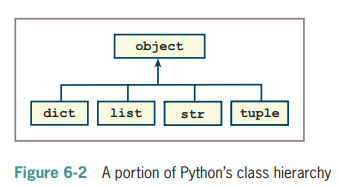

Когда вы определяете новый класс и исключаете родительский класс из синтаксиса, Python автоматически устанавливает этот класс под классом object.

Когда вы разрабатываете новый набор классов коллекций, обычно не рекомендуется создавать подклассы
под встроенным классом коллекции Python, таким как str или list. Вместо этого вам следует разработать
свои собственные классы, соответствующие интерфейсам, и поместить самый верхний класс в вашей иерархии
в класс object, как это делается в этой книге.

Python поддерживает подклассы и наследование с несколькими родительскими классами, что является особенностью
полезно в некоторых продвинутых приложениях.

## **Использование абстрактных классов для устранения избыточного кода**

Интересно обнаружить, что подклассы и наследование позволяют вам опускать некоторый код
из нового класса вместо того, чтобы сохранять его. Сохранить его, как вы сделали в проекте sorted bag из
Главы 5, означало бы допустить ненужную избыточность.
Еще одно место, где можно увидеть избыточный код в своих коллекциях пакетов
, - это классы ArrayBag и LinkedBag. Напомним, что когда вы создавали LinkedBag, скопировав код из
ArrayBag в главе 5, несколько методов менять не пришлось. Они выглядят одинаково в
обоих классах; следовательно, они по определению избыточны.

Известно, как избежать этой проблемы с отсортированными пакетами, сохранив потенциально
избыточные методы в родительском классе и передав их другому классу посредством наследования.
В этом разделе вы узнаете, как устранить избыточные методы и данные в наборе существующих классов путем преобразования кода для них в общий суперкласс.

Такой класс
называется абстрактным классом, чтобы указать, что он отражает общие функции и поведение
из набора связанных классов. Абстрактный класс обычно не создается в клиентских приложениях. Его подклассы называются конкретными классами, чтобы указать, что они являются классами
, фактически используемыми для создания объектов в клиентских приложениях. Обе категории классов, в свою очередь
, отличаются от интерфейсов (см. главу 5 “Интерфейсы, реализации и полиморфизм”), которые просто определяют методы данного класса или набора классов без какого-либо
реализующего кода.

## **Разработка абстрактного класса багов**

Программисты обычно обнаруживают необходимость в абстрактном классе после того, как они разработали два
или более классов и заметили некоторые избыточные методы и переменные. В случае ваших
классов bag наиболее очевидными избыточными методами являются те, которые просто вызывают другие классы и методы и не имеют прямого доступа к переменным экземпляра. Они включают методы
isEmpty, __str__, __add__, count и __eq__.

Избыточные переменные экземпляра немного сложнее обнаружить. Ваши классы bag используют две
переменные экземпляра с именами self.items и self.size. Чтобы обнаружить избыточность, вы должны посмотреть
на типы данных, на которые ссылаются переменные. В каждом классе self.items ссылается на
другой тип структуры данных. (Вот почему они называются разными реализациями.)

Напротив, self.size относится к целочисленному значению в каждом классе bag. Следовательно, только
self.size является избыточной переменной экземпляра и, следовательно, безопасным кандидатом для перемещения в
абстрактный класс.
Поскольку метод __len__ обращается к self.size, но не к self.items, он также считается
избыточным методом. В общем, методы, которые напрямую обращаются к self.items или изменяют их, должны
оставаться в конкретных классах.

Вы можете удалить избыточные методы из классов bag и поместить их в новый класс
с именем AbstractBag. Классы bag затем получают доступ к этим методам посредством наследования, становясь подклассами AbstractBag. Измененная структура ваших классов bag показана на
диаграмма классов на рис. 6-3.

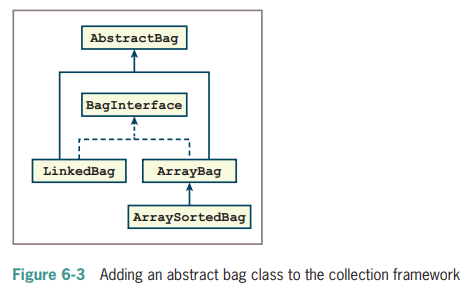

## **Повторно создаем метод __init__ в AbstractBag**

Метод __init__ в AbstractBag отвечает за выполнение двух шагов:


1.   Вводим переменную self.size и инициализируем ее значением 0.
2.   Добавление элементов из исходной коллекции в self, если исходная коллекция
присутствует.

Следовательно, вы удаляете строку кода, которая инициализирует переменную self.items. За этот код по-
прежнему отвечает метод __init__ в подклассах.
Вот код для метода __init__ в Abstract Bag:


In [5]:
"""
File: abstractbag.py
Author: Ken Lambert
"""

class AbstractBag(object):
    """An abstract bag implementation."""
    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it’s present."""
        self.size = 0
        if sourceCollection:
            for item in sourceCollection:
                self.add(item)

## ** Изменение подкласса AbstractBag**

Каждый подкласс Abstract Bag теперь должен импортировать этот класс, поместить его имя в круглые скобки в заголовке класса, опустить избыточные методы, упомянутые ранее, и включить
модифицированный метод __init__.

Изучите изменения в методе __init__ ArrayBag. Этот метод по-прежнему отвечает
за установку self.items в новый массив, но это единственная строка кода, сохраненная из предыдущего.
После выполнения этого кода запустите метод __init__ в Abstract Bag, который инициализирует размер
пакета и при необходимости добавляет элементы из исходной коллекции. Вот код для
этих изменений в __init__ в ArrayBag:

In [7]:
"""
File: arrays.py
An Array is like a list, but the client can use
only [], len, iter, and str.
To instantiate, use
<variable> = Array(<capacity>, <optional fill value>)
The fill value is None by default.
"""

class Array(object):
    """Represents an array."""

    def __init__(self, capacity, fillValue = None):
        """Capacity is the static size of the array.
        fillValue is placed at each position."""
        self.items = list()
        for count in range(capacity):
            self.items.append(fillValue)

    def __len__(self):
        """-> The capacity of the array."""
        return len(self.items)

    def __str__(self):
        """-> The string representation of the array."""
        return str(self.items)

    def __iter__(self):
        """Supports traversal with a for loop."""
        return iter(self.items)

    def __getitem__(self, index):
        """Subscript operator for access at index."""
        return self.items[index]

    def __setitem__(self, index, newItem):
        """Subscript operator for replacement at index."""
        self.items[index] = newItem

In [8]:
"""
File: arraybag.py
Author: Ken Lambert
"""

class ArrayBag(AbstractBag):
    """An array-based bag implementation."""

    # Class variable
    DEFAULT_CAPACITY = 10

    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it’s present."""
        self.items = Array(ArrayBag.DEFAULT_CAPACITY)
        AbstractBag.__init__(self, sourceCollection)

    def __add__(self, other):
        """Returns a new bag containing the contents
        of self and other."""
        result = type(self)(self)
        for item in other:
            result.append(item)
        return result


## **Абстрактный класс для всех коллекций**


Если ознакомиться с кодом класса AbstractBag, вы можете заметить в нем кое-что интересное
. Все его методы, включая __init__, запускают другие методы или функции или просто
обращаются к переменной self.size. В них не упоминаются классы bag. За исключением
метода __str__, который создает строку с фигурными скобками, и метода __eq__,
который не сравнивает пары элементов в заданных позициях, методы
AbstractBag также являются методами, которые можно запускать для любых других типов коллекций, таких как списки, стопки и
очереди. Наконец, одна переменная экземпляра, self.size, также может быть использована при реализации
любой коллекции.

Это понимание указывает на то, что вам было бы неплохо отнести эти методы и данные
к еще более общему абстрактному классу, где они были бы доступны для других типов коллекций, которые еще предстоит разработать. Такой класс, называемый AbstractCollection, будет служить
ключевым классом всей вашей иерархии коллекций.

### **Интеграция AbstractCollection в иерархию коллекций**

Класс AbstractCollection отвечает за введение и инициализацию переменной
self.size. Эта переменная используется всеми классами коллекций, расположенными ниже нее в иерархии.

Метод __init__ AbstractCollection также может добавлять элементы из исходной коллекции в self, если это необходимо.

Этот класс также включает в себя наиболее общие методы, доступные для всех коллекций: is Empty,
__len__, count и __add__. “Наиболее общие” в данном случае означает, что их реализация
никогда не должна изменяться подклассом.

Подробнее рассмотрено на схеме 6-4.

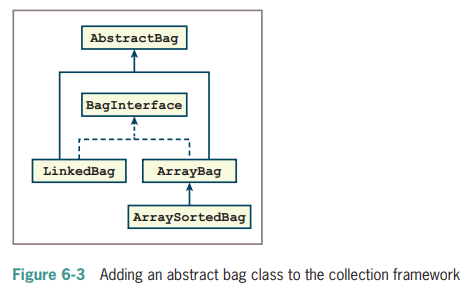

### **Использование двух итераторов в методе __eq__**

Реализация метода __eq__ в классе AbstractCollection сравнивает
пары элементов в двух коллекциях. Это делается путем одновременного перебора последовательностей элементов
в обеих коллекциях. Но как этого можно достичь, когда можно запускать
цикл for только над одной коллекцией за раз?
Ответ на этот вопрос заключается в явном манипулировании объектом iterator второй коллекции
.

Когда программист вызывает функцию iter для коллекции,
возвращается объект iterator коллекции. Когда программист вызывает следующую функцию для итератора
объект, функция возвращает текущий элемент в последовательности итератора и переходит к
следующему элементу, если таковой имеется. Если в последовательности нет текущего элемента, функция next
вызывает исключение StopIteration.

Например, следующие два сегмента кода выполняют одну и ту же задачу, но первый использует
Цикл for в Python, а второй непосредственно манипулирует объектом iterator коллекции:

In [10]:
theCollection = []

# Print all the items in theCollection using a for loop
for item in theCollection:
    print(item)

# Print all the items in theCollection using an explicit iterator
iteratorObject = iter(theCollection)
try:
    while True:
        print(next(iteratorObject))
except StopIteration: pass

Когда используется явный итератор в методе __eq__ AbstractCollection, нет
необходимости перехватывать исключение StopIteration. Поскольку две коллекции имеют одинаковую
длину, цикл for в первой коллекции остановится, когда итератор во второй коллекции достигнет конца своей последовательности элементов. Вот код для нового метода __eq__:

In [11]:
def __eq__(self, other):
    """Returns True if self equals other, or False otherwise."""
    if self is other: return True
    if type(self) != type(other) or len(self) != len(other):
        return False
    otherIter = iter(other)
    for item in self:
        if item != next(otherIter):
            return False
    return True

## **Подборка коллекций профессионального качества**

В этой главе вы взяли три реализации класса bag, разработанные в главе 5
(“Интерфейсы, реализации и полиморфизм”), и разместили их в иерархии классов.
Хотя эти классы продолжают реализовывать один и тот же интерфейс bag, теперь они совместно
используют большую часть кода, который вы включили в абстрактные классы. Основная цель изучения
этой главы - научиться повторно использовать код и устранять избыточный код с помощью механизма
наследования, доступного в иерархии классов.

В процессе вы также разработали базовый фреймворк, который может совместно использовать код с другими приложениями.
ресурсы, которые еще предстоит разработать, такие как различные реализации коллекций list, dictionary, stack,
queue, tree и graph. На рисунке 6-5 показана схема того, как могла бы выглядеть более или менее полная структура таких коллекций.

Другие языки программирования, такие как Java, включают в себя платформу сбора данных, которая является менее
полной, чем эта, но более обширной, чем у Python. По мере изучения линейных,
иерархических, неупорядоченных коллекций и коллекций графиков в следующих главах у вас будет
возможность разработать ресурсы, дополняющие структуру, показанную на рис. 6-5.

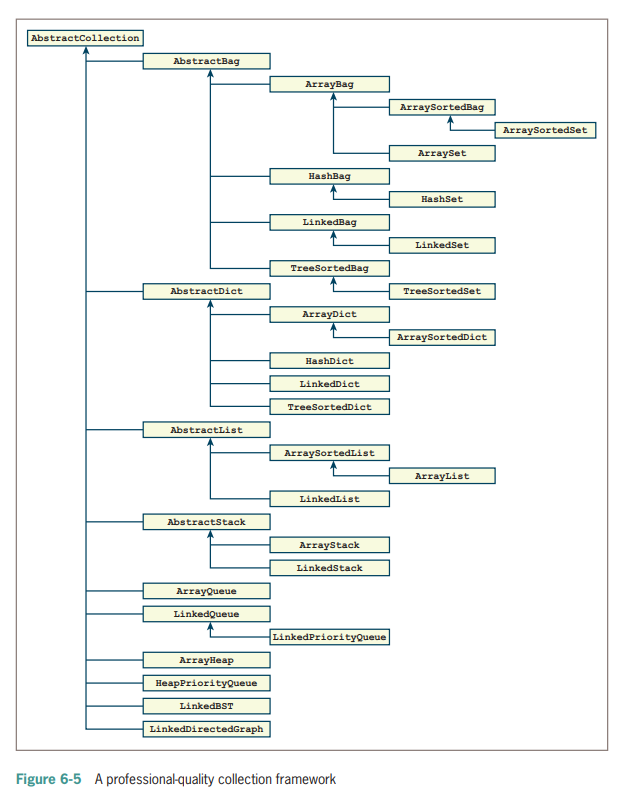